In [1]:
#Importing Relevant Libraries
import pandas as pd #to load in the dataset
import numpy as np #to load in the dataset
from sklearn import linear_model #for the model training
from sklearn.model_selection import train_test_split #for train-test splitting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the training dataset
data_train = pd.read_csv('train.csv')
data_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,26,120,59,7.10,98.0,65,mid risk
1,14,131,79,6.84,98.0,70,mid risk
2,28,121,89,6.04,98.0,77,mid risk
3,24,91,100,7.75,98.0,79,high risk
4,23,120,66,6.98,98.0,84,mid risk
...,...,...,...,...,...,...,...
3995,37,98,51,7.23,98.0,78,low risk
3996,25,101,79,7.21,98.0,70,low risk
3997,42,120,85,6.11,98.0,78,mid risk
3998,34,119,79,6.83,98.0,76,high risk


In [3]:
data_test = pd.read_csv("test.csv")
data_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,30,87,81,7.13,98.0,78
1,33,119,89,7.01,98.0,65
2,35,128,84,6.69,98.0,56
3,36,119,62,6.25,100.7,64
4,23,150,69,7.21,98.0,86
...,...,...,...,...,...,...
995,29,121,68,7.53,98.0,86
996,25,119,79,6.28,98.0,70
997,15,120,79,6.50,98.0,78
998,35,93,68,10.96,98.0,70


In [4]:
#Checking for null values in the data set
data_train.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
data_train['RiskLevel'].nunique()

3

In [6]:
#Checking for data type
data_train.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Text(0.5, 1.0, 'Distribution of HeartRate')

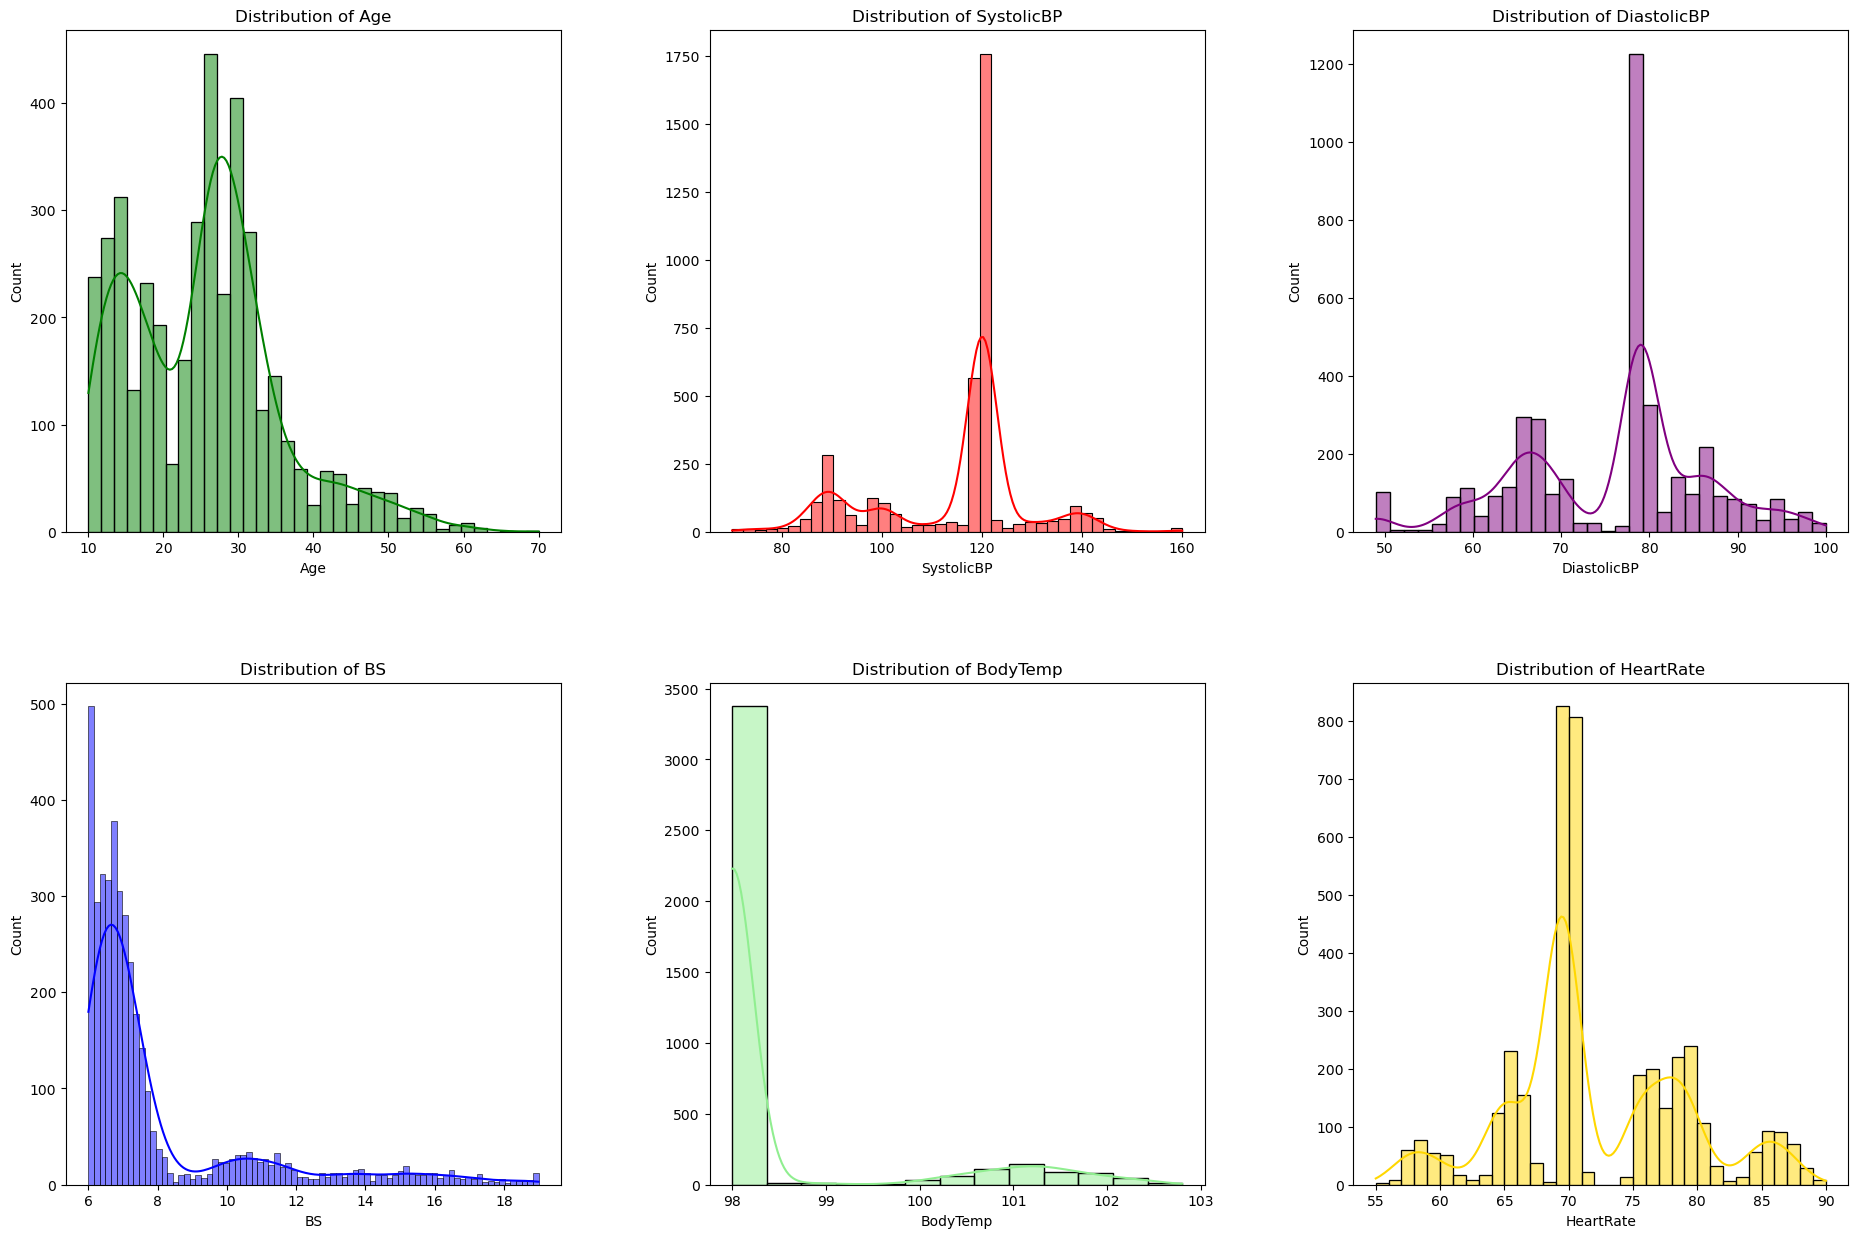

In [7]:
#Check for normality of the data set 
#Distribution of continuous variables in one plot
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(data_train['Age'], color='g', kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(data_train['SystolicBP'], color='r', kde=True)
plt.title('Distribution of SystolicBP')

plt.subplot(2, 3, 3)
sns.histplot(data_train['DiastolicBP'], color='purple', kde=True)
plt.title('Distribution of DiastolicBP')

plt.subplot(2, 3, 4)
sns.histplot(data_train['BS'], color='blue', kde=True)
plt.title('Distribution of BS')

plt.subplot(2, 3, 5)
sns.histplot(data_train['BodyTemp'], color='lightgreen', kde=True)
plt.title('Distribution of BodyTemp')

plt.subplot(2, 3, 6)
sns.histplot(data_train['HeartRate'], color='gold', kde=True)
plt.title('Distribution of HeartRate')

##### By visual inspection the variables are not normally distributed 

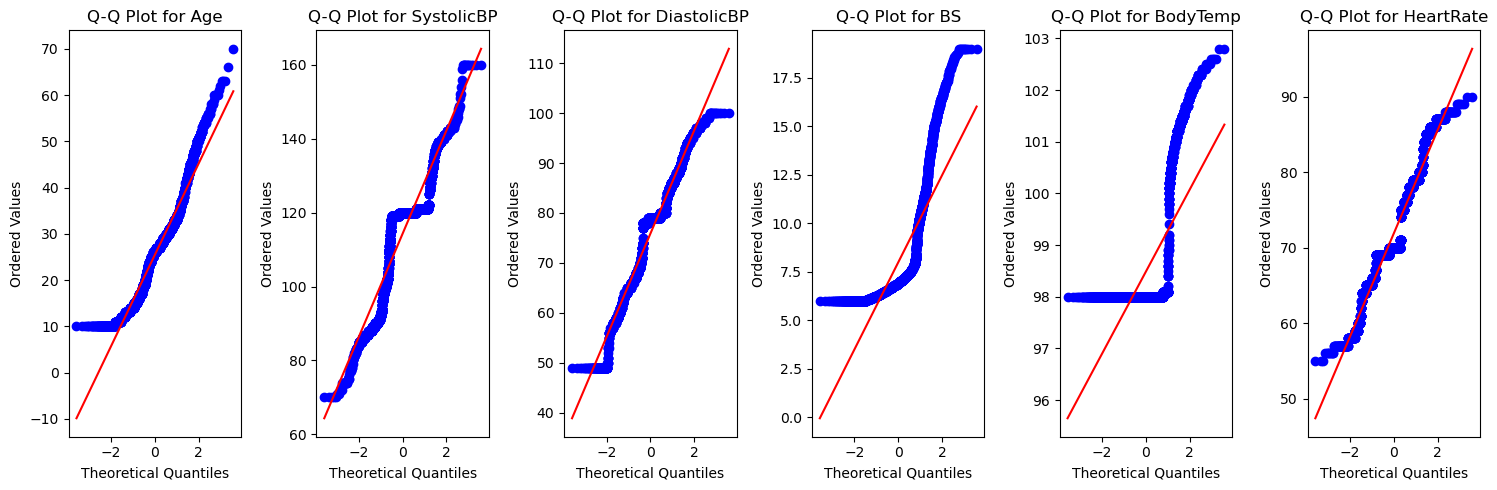

In [8]:
#Using Q-Q plot to determine normal distribution of the variables
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for i, col in enumerate(variables):
    stats.probplot(data_train[col], dist= "norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {col}")
    axs[i].set_xlabel('Theoretical Quantiles')
    axs[i].set_ylabel('Ordered Values')
plt.tight_layout()
plt.show()
#plt.figure(figsize=(6, 6))
#stats.probplot(data_train, dist= "norm", plot=plt)

#### The Q-Q plots confirms that the continuous variables are not normally distributed 

### #Using Shapiro Wilt test to confirm normality of the variables 
#### #Null Hypothesis: Age is normally distributed
#### #Alternative Hypothesis: Age is not normally distributed

In [9]:
#Import shapiro from scipy_stats
from scipy.stats import shapiro

In [10]:
statistic, p_value = shapiro(data_train['Age'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [11]:
statistic, p_value = shapiro(data_train['SystolicBP'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [12]:
statistic, p_value = shapiro(data_train['DiastolicBP'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [13]:
statistic, p_value = shapiro(data_train['BS'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [14]:
statistic, p_value = shapiro(data_train['BodyTemp'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [15]:
statistic, p_value = shapiro(data_train['HeartRate'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


#### The histogram, Q-Q and the Shapiro Wilt test all have show that the continuous variables train the data set are not normally distributed. Thus we need to log transform the variables

In [16]:
data_train['log_Age'] = data_train['Age'].apply(np.log)
data_train['log_SystolicBP'] = data_train['SystolicBP'].apply(np.log)
data_train['log_DiastolicBP'] = data_train['DiastolicBP'].apply(np.log)
data_train['log_BS'] = data_train['BS'].apply(np.log)
data_train['log_BodyTemp'] = data_train['BodyTemp'].apply(np.log)
data_train['log_HeartRate'] = data_train['HeartRate'].apply(np.log)

Text(0.5, 1.0, 'Distribution of log_HeartRate')

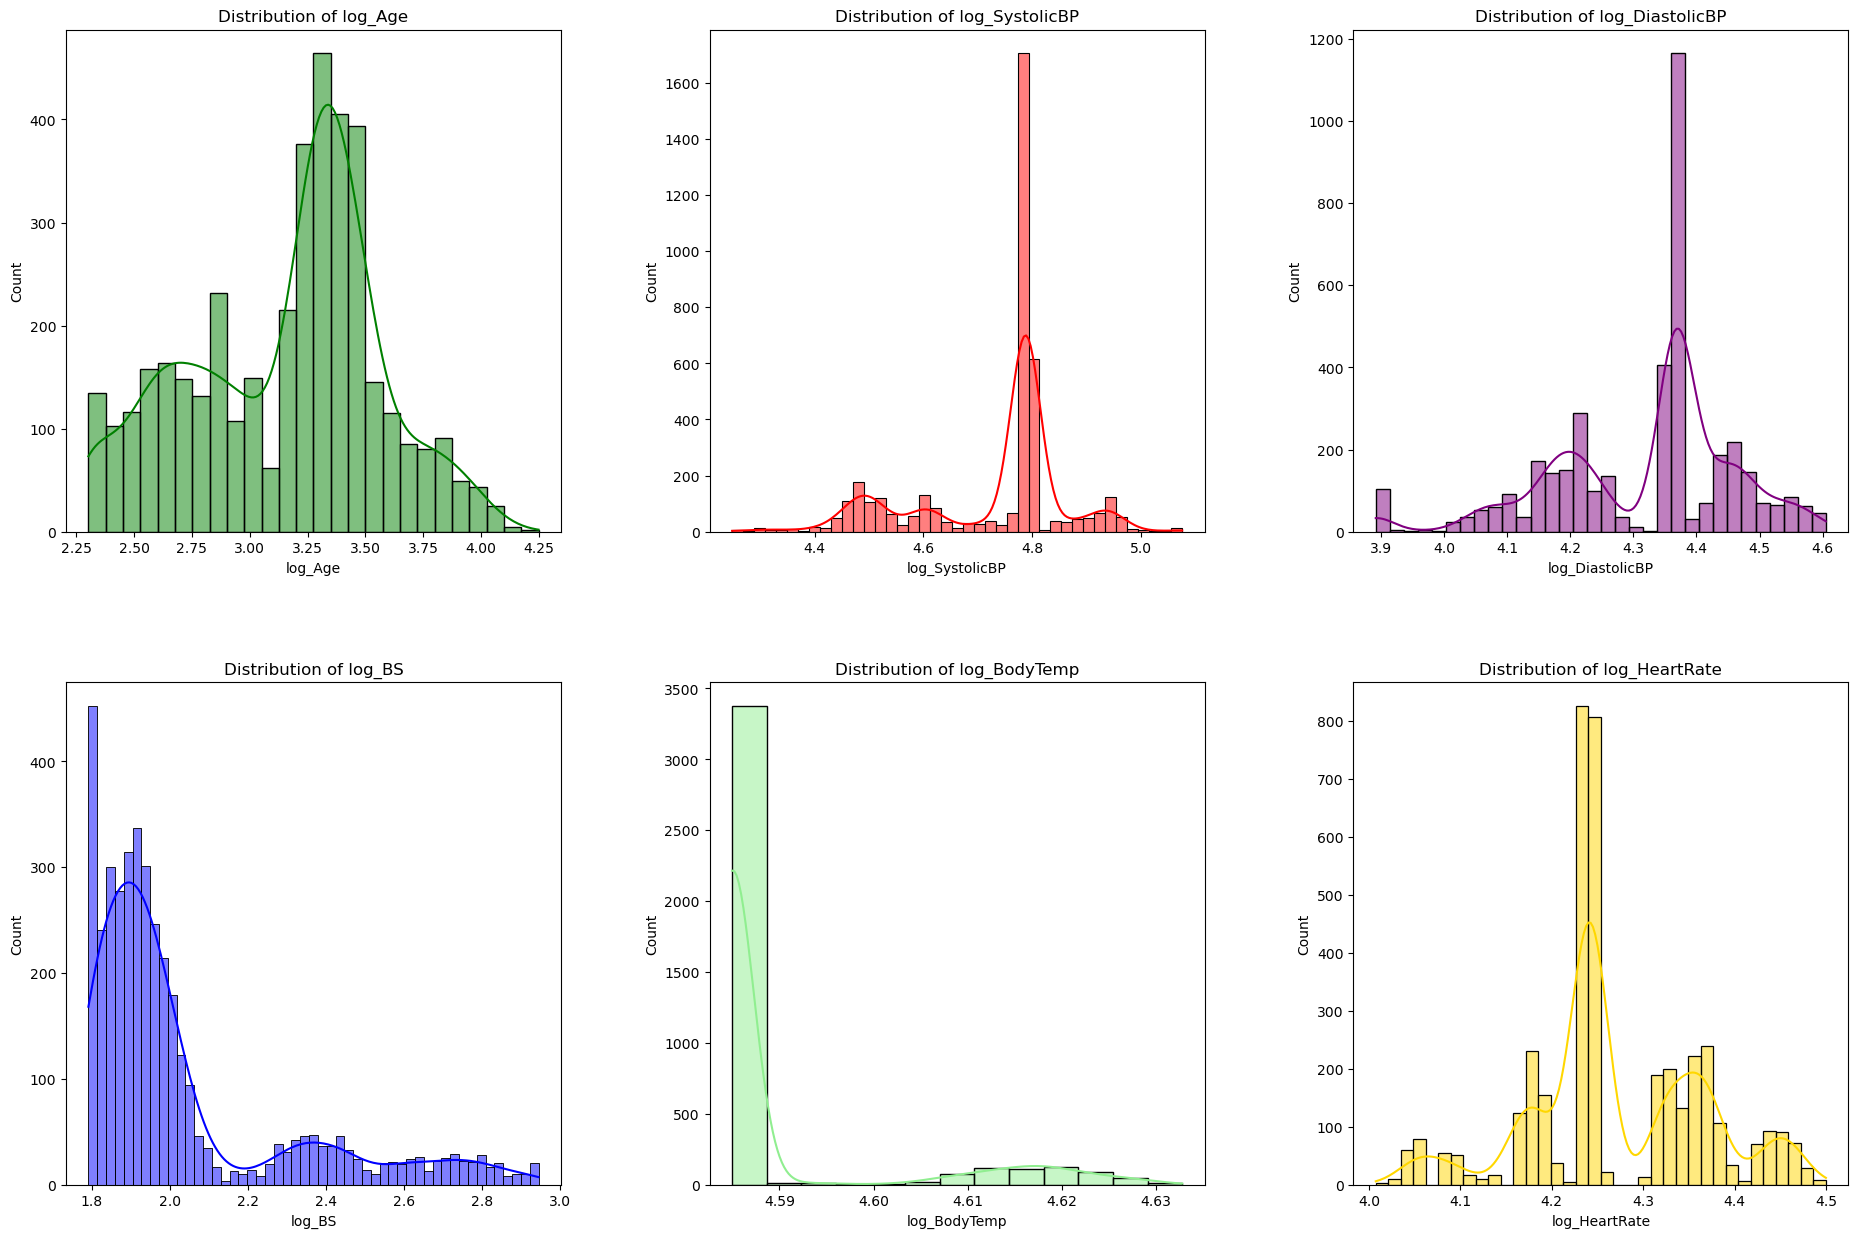

In [17]:
#Check for normality of the data set 
#Distribution of continuous variables in one plot
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(data_train['log_Age'], color='g', kde=True)
plt.title('Distribution of log_Age')

plt.subplot(2, 3, 2)
sns.histplot(data_train['log_SystolicBP'], color='r', kde=True)
plt.title('Distribution of log_SystolicBP')

plt.subplot(2, 3, 3)
sns.histplot(data_train['log_DiastolicBP'], color='purple', kde=True)
plt.title('Distribution of log_DiastolicBP')

plt.subplot(2, 3, 4)
sns.histplot(data_train['log_BS'], color='blue', kde=True)
plt.title('Distribution of log_BS')

plt.subplot(2, 3, 5)
sns.histplot(data_train['log_BodyTemp'], color='lightgreen', kde=True)
plt.title('Distribution of log_BodyTemp')

plt.subplot(2, 3, 6)
sns.histplot(data_train['log_HeartRate'], color='gold', kde=True)
plt.title('Distribution of log_HeartRate')

In [18]:
statistic, p_value = shapiro(data_train['log_Age'])
statistic, p_value
# Interpret the results
#alpha = 0.05 # Significance level
#if p_value > alpha:
#    print("The data looks Gaussian (fail to reject H0)")
#else:
 #   print("The data does not look Gaussian (reject H0)")

(0.9663404226303101, 1.319653366888487e-29)

### Preprocessing 

In [19]:
# Convert categorical traget column into numeric

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_train['RiskLevel'] = label_encoder.fit_transform(data_train['RiskLevel'])

### Training a Logistic Regression Model

In [20]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Drop the target column from the training set to create X_train
X_train = data_train.drop('RiskLevel', axis=1)
# Set y_train as the target variable
y_train = data_train['RiskLevel']

print(X_train)
print(y_train)


      Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate   log_Age  \
0      26         120           59   7.10      98.0         65  3.258097   
1      14         131           79   6.84      98.0         70  2.639057   
2      28         121           89   6.04      98.0         77  3.332205   
3      24          91          100   7.75      98.0         79  3.178054   
4      23         120           66   6.98      98.0         84  3.135494   
...   ...         ...          ...    ...       ...        ...       ...   
3995   37          98           51   7.23      98.0         78  3.610918   
3996   25         101           79   7.21      98.0         70  3.218876   
3997   42         120           85   6.11      98.0         78  3.737670   
3998   34         119           79   6.83      98.0         76  3.526361   
3999   12         120           86  15.05      98.0         67  2.484907   

      log_SystolicBP  log_DiastolicBP    log_BS  log_BodyTemp  log_HeartRate  
0       

In [23]:
#splitting the data into train and validation

#Split data into training and validating sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [24]:
#Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Step 5: Make predictions
y_pred = model.predict(X_val)

In [26]:
#Evaluating the model's performance using accuracy as the metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.51375


- this model is performing at 51% this is quit low , Improve the model performance by normalizing the features 
- build other classification model at list three 


## predicting the target value of the testset for submission in kaggle 

In [27]:
#testing the trained model

# Create X_test data
X_test = data_test
# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [28]:
#Make predictions
y_pred = model.predict(X_test)

In [31]:
submission = pd.DataFrame(y_pred)

In [32]:
submission 

,0
0,1
1,2
2,2
3,1
4,2
...,...
995,0
996,2
997,2
998,0


- after getting the target value of the test set ; save the result in csv format and submit on kaggle 